# Purpose
Predict survivability for titanic passengers

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
filepath = 'C:/Users/nowic/Desktop/home_tasks/pets/titanic/raw_data/'

titanic_train = pd.read_csv(f'{filepath}train.csv')
titanic_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [8]:
titanic_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<AxesSubplot:>

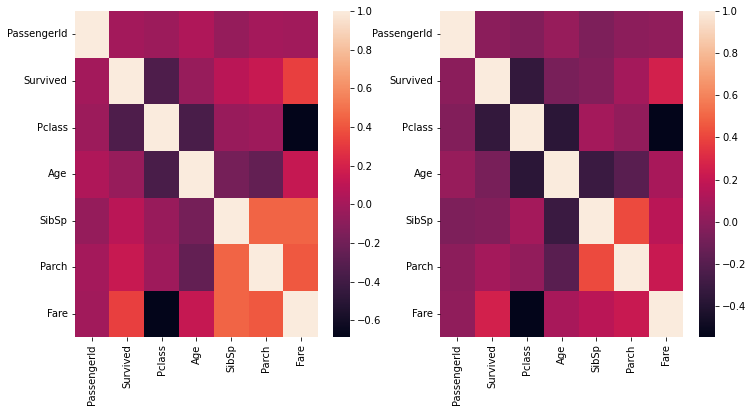

In [3]:
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
sns.heatmap(data=titanic_train.corr(method='spearman'), ax=axes[0])
sns.heatmap(data=titanic_train.corr(), ax=axes[1])

<AxesSubplot:xlabel='Sex', ylabel='Count'>

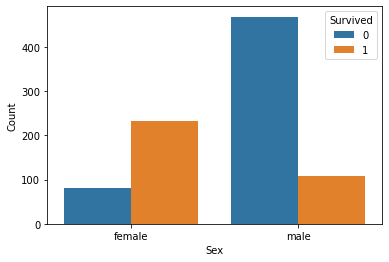

In [4]:
sex_surv = titanic_train.groupby(['Survived', 'Sex'], as_index=False).agg({'Name': 'count'}).rename(columns={'Name': 'Count'})
sns.barplot(x='Sex', y='Count', data=sex_surv, hue='Survived')

<AxesSubplot:xlabel='Survived', ylabel='Count'>

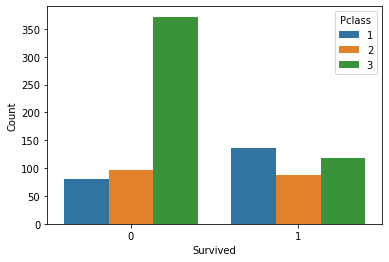

In [7]:
pclass_surv = titanic_train.groupby(['Pclass', 'Survived'], as_index=False).agg({'Name': 'count'}).rename(columns={'Name': 'Count'})
sns.barplot(x='Survived', y='Count', data=pclass_surv, hue='Pclass')

In [16]:
sex_pclass_surv = titanic_train.groupby(['Sex', 'Pclass', 'Survived'], as_index=False).agg({'Name': 'count'}).rename(columns={'Name': 'Count'})
sex_pclass_surv

,Sex,Pclass,Survived,Count
0,female,1,0,3
1,female,1,1,91
2,female,2,0,6
3,female,2,1,70
4,female,3,0,72
5,female,3,1,72
6,male,1,0,77
7,male,1,1,45
8,male,2,0,91
9,male,2,1,17


In [22]:
female_pclass_surv = sex_pclass_surv.query('Sex == "female"')
female_pclass_surv = female_pclass_surv.drop('Sex', axis=1)
female_pclass_surv

,Pclass,Survived,Count
0,1,0,3
1,1,1,91
2,2,0,6
3,2,1,70
4,3,0,72
5,3,1,72


In [23]:
male_pclass_surv = sex_pclass_surv.query('Sex == "male"')
male_pclass_surv = male_pclass_surv.drop('Sex', axis=1)
male_pclass_surv

,Pclass,Survived,Count
6,1,0,77
7,1,1,45
8,2,0,91
9,2,1,17
10,3,0,300
11,3,1,47


Text(0.5, 1.0, 'Male')

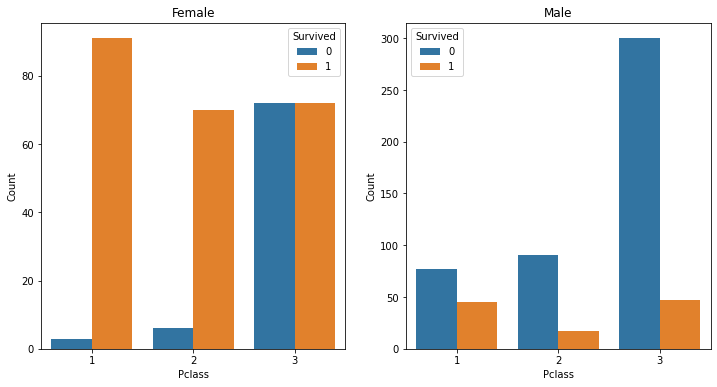

In [25]:
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
female_surv_barplot = sns.barplot(x='Pclass', y='Count', hue='Survived', data=female_pclass_surv, ax=axes[0])
male_surv_barplot = sns.barplot(x='Pclass', y='Count', hue='Survived', data=male_pclass_surv, ax=axes[1])

female_surv_barplot.set_title('Female')
male_surv_barplot.set_title('Male')

# fillna() Age with median

In [9]:
age_median = titanic_train['Age'].median()
age_median

28.0

In [14]:
titanic_train['Age'].fillna(value=age_median, inplace=True)
titanic_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
